In [1]:
%matplotlib inline

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from numba import njit
import scipy.interpolate
import scipy.optimize
import os
import lmfit
from tqdm import tqdm
import datetime

import fit_functions
import nekhoroshev_tools

In [51]:
module_to_index = {
    100.0:0, 250.0:1, 500.0:2, 750.0:3, 1000.0:4, 1250.0:5, 1500.0:6, 1750.0:7, 2000.0:8
}
spline_to_index = {
    "loss_1_rs6":0, "loss_1_rs6_mult_1_25":1, "loss_1_rs6_mult_1_5":2, "loss_1_rs6_mult_2_0":3
}

In [121]:
fit_result_module_b1_v = {}

for module in [100.0, 250.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0, 2000.0, 5000.0, 10000.0]:
    for key in ["loss_1_rs6", "loss_1_rs6_mult_1_25", "loss_1_rs6_mult_1_5", "loss_1_rs6_mult_2_0"]:
        try:
            with open(f"fit_result_b1_v_{key}_single_kmax_2.1_module_{module}.pkl", "rb") as f:
                fit_result_module_b1_v[(module, key)] = pickle.load(f)
        except:
            print(module, key, "missing!")

5000.0 loss_1_rs6 missing!
5000.0 loss_1_rs6_mult_1_25 missing!
5000.0 loss_1_rs6_mult_1_5 missing!
5000.0 loss_1_rs6_mult_2_0 missing!
10000.0 loss_1_rs6 missing!
10000.0 loss_1_rs6_mult_1_25 missing!
10000.0 loss_1_rs6_mult_1_5 missing!
10000.0 loss_1_rs6_mult_2_0 missing!


In [3]:
keys = []
results = []
errors = []
values = []

for key in fit_result_module_b1_v:
    if "mult_1_5" in key[1]:
        keys.append(key)
        results.append(fit_result_module_b1_v[key][0])
        errors.append(fit_result_module_b1_v[key][0].chisqr)
        values.append((fit_result_module_b1_v[key][1], fit_result_module_b1_v[key][2]))

In [122]:
val_map = np.empty((9, 4))

keys = []
results = []
errors = []
values = []

for key in fit_result_module_b1_v:
    # if "mult_1_5" in key[1]:
    keys.append(key)
    results.append(fit_result_module_b1_v[key][0])
    errors.append(fit_result_module_b1_v[key][0].chisqr)
    values.append((fit_result_module_b1_v[key][1], fit_result_module_b1_v[key][2]))

    val_map[module_to_index[key[0]], spline_to_index[key[1]]] = fit_result_module_b1_v[key][0].chisqr

In [57]:
np.argmin(val_map)

21

In [123]:
print(np.log10(val_map))
print(np.max(np.log10(val_map)))
print(np.min(np.log10(val_map)))

[[0.77822323 0.97047436 1.20380849 1.46969978]
 [0.72759873 0.62821501 0.85489482 1.17940199]
 [0.84187386 0.50207635 0.5441377  0.87182428]
 [0.92445818 0.56580206 0.44706303 0.66993772]
 [0.97566618 0.64294348 0.45939921 0.54832575]
 [1.00867712 0.70461584 0.50493991 0.48835271]
 [1.03090932 0.75134427 0.55349682 0.46931414]
 [1.04644462 0.78682368 0.59662428 0.47355998]
 [1.05763409 0.81413363 0.63297022 0.4892446 ]]
1.469699780041557
0.4470630269192438


In [124]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

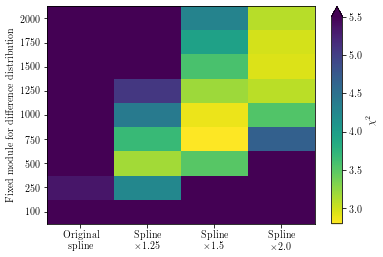

In [125]:
plt.imshow(val_map, origin="lower", aspect="auto", interpolation="none", cmap="viridis_r", vmax=5.5)
plt.colorbar(extend="max", label="$\\chi^2$")
plt.xticks(np.arange(4), ["Original\nspline", "Spline\n$\\times 1.25$", "Spline\n$\\times 1.5$", "Spline\n$\\times 2.0$"])
plt.yticks(np.arange(9), [100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])
plt.ylabel("Fixed module for difference distribution")

plt.savefig("ipac_plots/fourth.pdf", bbox_inches="tight", pad_inches=0.1, dpi=300)
plt.savefig("ipac_plots/fourth.png", bbox_inches="tight", pad_inches=0.1, dpi=300)
plt.savefig("ipac_plots/fourth.jpg", bbox_inches="tight", pad_inches=0.1, dpi=300)

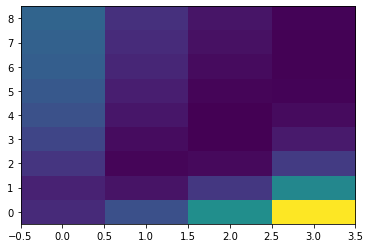

In [64]:
plt.imshow((val_map), origin="lower", aspect="auto")

In [8]:
idx = np.argmin(errors)
np.argmin(errors)

14

In [10]:
keys[idx]

(750.0, 'loss_1_rs6_mult_1_5')

In [11]:
results[idx]

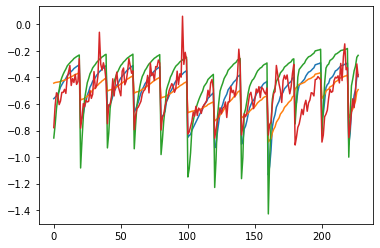

In [18]:
plt.plot(values[idx][1])

plt.plot(fit_result_module_b1_v[(2000.0, 'loss_1_rs6_mult_1_5')][2])
plt.plot(fit_result_module_b1_v[(250.0, 'loss_1_rs6_mult_1_5')][2])

plt.plot(values[idx][0])


In [126]:
fit_result_module_b2_v = {}

for module in [100.0, 250.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0, 2000.0, 5000.0, 10000.0]:
    for key in ["loss_1_rs6", "loss_1_rs6_mult_1_25", "loss_1_rs6_mult_1_5", "loss_1_rs6_mult_2_0"]:
        try:
            with open(f"fit_result_b2_v_{key}_single_kmax_2.1_module_{module}.pkl", "rb") as f:
                fit_result_module_b2_v[(module, key)] = pickle.load(f)
        except:
            print(module, key, "missing!")

5000.0 loss_1_rs6 missing!
5000.0 loss_1_rs6_mult_1_25 missing!
5000.0 loss_1_rs6_mult_1_5 missing!
5000.0 loss_1_rs6_mult_2_0 missing!
10000.0 loss_1_rs6 missing!
10000.0 loss_1_rs6_mult_1_25 missing!
10000.0 loss_1_rs6_mult_1_5 missing!
10000.0 loss_1_rs6_mult_2_0 missing!


In [127]:
keys = []
results = []
errors = []
values = []

for key in fit_result_module_b2_v:
    # if "mult_1_5" in key[1]:
        keys.append(key)
        results.append(fit_result_module_b2_v[key][0])
        errors.append(fit_result_module_b2_v[key][0].chisqr)
        values.append((fit_result_module_b2_v[key][1], fit_result_module_b2_v[key][2]))

In [130]:
keys = []
results = []
errors = []
values = []
I_star = []
kappa = []

for key in fit_result_module_b2_v:
    if fit_result_module_b2_v[key][0].params["I_star"].value < 100.0:
        keys.append(key)
        results.append(fit_result_module_b2_v[key][0])
        errors.append(fit_result_module_b2_v[key][0].chisqr)
        values.append((fit_result_module_b2_v[key][1], fit_result_module_b2_v[key][2]))
        I_star.append(fit_result_module_b2_v[key][0].params["I_star"].value)
        kappa.append(fit_result_module_b2_v[key][0].params["k"].value)

In [131]:
keys

[(100.0, 'loss_1_rs6'),
 (250.0, 'loss_1_rs6'),
 (250.0, 'loss_1_rs6_mult_1_25'),
 (500.0, 'loss_1_rs6'),
 (500.0, 'loss_1_rs6_mult_1_25'),
 (750.0, 'loss_1_rs6'),
 (750.0, 'loss_1_rs6_mult_1_25'),
 (1000.0, 'loss_1_rs6'),
 (1250.0, 'loss_1_rs6'),
 (1500.0, 'loss_1_rs6')]

In [135]:
idx = np.argmin(I_star)

In [134]:
idx = np.argmin(errors)
np.argmin(errors)

4

In [113]:
keys[idx]

(500.0, 'loss_1_rs6_mult_1_25')

In [136]:
results[idx]

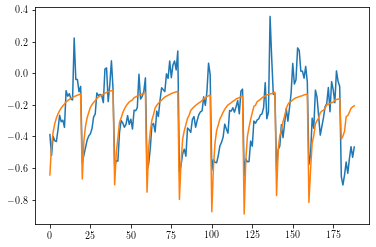

In [138]:
plt.plot(values[idx][0])
plt.plot(values[idx][1])

In [51]:
fit_result_module_b1_h = {}

for module in [100.0, 250.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0, 2000.0, 5000.0, 10000.0]:
    for key in ["loss_1_rs6", "loss_1_rs6_mult_1_25", "loss_1_rs6_mult_1_5", "loss_1_rs6_mult_2_0"]:
        try:
            with open(f"fit_result_b1_h_{key}_single_kmax_2.1_module_{module}.pkl", "rb") as f:
                fit_result_module_b1_h[(module, key)] = pickle.load(f)
        except:
            print(module, key, "missing!")

5000.0 loss_1_rs6 missing!
5000.0 loss_1_rs6_mult_1_25 missing!
5000.0 loss_1_rs6_mult_1_5 missing!
5000.0 loss_1_rs6_mult_2_0 missing!
10000.0 loss_1_rs6 missing!
10000.0 loss_1_rs6_mult_1_25 missing!
10000.0 loss_1_rs6_mult_1_5 missing!
10000.0 loss_1_rs6_mult_2_0 missing!


In [52]:
keys = []
results = []
errors = []
values = []
I_star = []
kappa = []

for key in fit_result_module_b1_h:
    # if "mult_1_5" in key[1]:
    keys.append(key)
    results.append(fit_result_module_b1_h[key][0])
    errors.append(fit_result_module_b1_h[key][0].chisqr)
    values.append((fit_result_module_b1_h[key][1], fit_result_module_b1_h[key][2]))
    I_star.append(fit_result_module_b1_h[key][0].params["I_star"].value)
    kappa.append(fit_result_module_b1_h[key][0].params["k"].value)

In [53]:
np.argmin(errors)

19

In [54]:
results[19]

In [55]:
keys[19]

(1000.0, 'loss_1_rs6_mult_2_0')

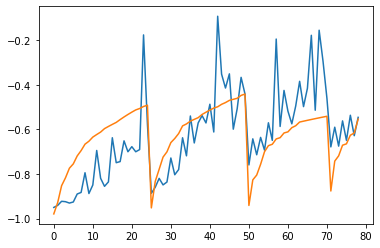

In [56]:
plt.plot(values[19][0])
plt.plot(values[19][1])

In [40]:
np.argmin(I_star)

5

In [41]:
results[5]

In [ ]:
keys[5]

(1000.0, 'loss_1_rs6_mult_2_0')

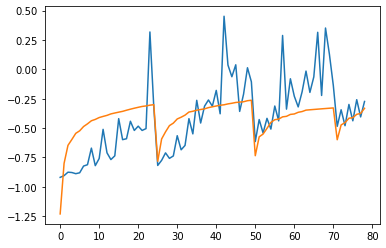

In [42]:
plt.plot(values[5][0])
plt.plot(values[5][1])

In [33]:
fit_result_module_b2_h = {}

for module in [100.0, 250.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0, 2000.0, 5000.0, 10000.0]:
    for key in ["loss_2_rs6", "loss_2_rs6_mult_1_25", "loss_2_rs6_mult_1_5", "loss_2_rs6_mult_2_0"]:
        try:
            with open(f"fit_result_b2_h_{key}_single_kmax_2.1_module_{module}.pkl", "rb") as f:
                fit_result_module_b2_h[(module, key)] = pickle.load(f)
        except:
            print(module, key, "missing!")

5000.0 loss_2_rs6 missing!
5000.0 loss_2_rs6_mult_1_25 missing!
5000.0 loss_2_rs6_mult_1_5 missing!
5000.0 loss_2_rs6_mult_2_0 missing!
10000.0 loss_2_rs6 missing!
10000.0 loss_2_rs6_mult_1_25 missing!
10000.0 loss_2_rs6_mult_1_5 missing!
10000.0 loss_2_rs6_mult_2_0 missing!


In [34]:
keys = []
results = []
errors = []
values = []

for key in fit_result_module_b2_h:
    # if "mult_1_5" in key[1]:
    keys.append(key)
    results.append(fit_result_module_b2_h[key][0])
    errors.append(fit_result_module_b2_h[key][0].chisqr)
    values.append((fit_result_module_b2_h[key][1], fit_result_module_b2_h[key][2]))

In [35]:
np.argmin(errors)

31

In [36]:
results[31]

In [ ]:
keys[31]

(1000.0, 'loss_1_rs6_mult_2_0')

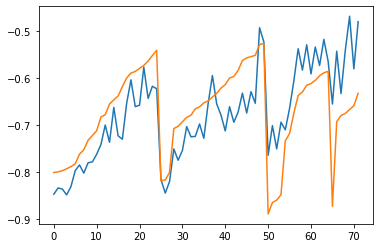

In [37]:
plt.plot(values[31][0])
plt.plot(values[31][1])